In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [41]:
kospi = pd.read_csv(r'..\..\..\..\Code\SH\csv\KOSPI 0020.csv', encoding='euc-kr')

In [42]:
kospi

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본증가율,경영자본순이익률,총자본순이익률,자기자본순이익률,순운전자본비율,비유동장기적합률,경영자본회전률,매입채무회전률,총자본투자효율,설비투자효율,재고자산회전률,매출채권회전률,자산총계(요약)(백만원),부채총계(요약)(백만원)
0,(주)DB하이텍,990,2000/12,1.0,NaN,UQ,0.50,1.92,1.67,4.76,-7.06,111.81,1.13,8.71,16.40,30.55,4.90,11.50,805757.0,516209.0
1,(주)DB하이텍,990,2001/12,1.0,NaN,UQ,1.34,0.79,0.69,1.92,-10.01,116.47,1.12,8.02,14.12,26.73,4.98,13.34,811974.0,518549.0
2,(주)DB하이텍,990,2002/12,1.0,NaN,UQ,2.07,2.34,1.95,5.50,-16.71,130.31,1.06,7.61,15.29,29.53,4.62,16.53,857183.0,557670.0
3,(주)DB하이텍,990,2003/12,1.0,NaN,NaN,7.45,1.80,1.50,4.20,-16.67,132.11,1.10,8.10,13.26,26.41,4.78,18.43,879135.0,557295.0
4,(주)DB하이텍,990,2004/12,1.0,NaN,UQ,16.45,5.18,4.41,11.76,-13.11,127.18,1.35,8.49,15.22,33.46,5.19,20.72,976639.0,601859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,흥아해운(주),3280,2013/12,1.0,NaN,UQ,24.54,4.29,3.08,12.85,-13.52,124.25,1.95,18.41,11.18,28.22,54.67,29.89,546190.0,405195.0
15673,흥아해운(주),3280,2014/12,1.0,NaN,UQ,9.18,3.77,2.82,11.21,-13.72,121.73,1.80,17.00,8.64,16.96,57.17,27.66,627805.0,473869.0
15674,흥아해운(주),3280,2007/12,1.0,NaN,UQ,-14.34,-3.34,-2.75,-14.66,-32.58,166.25,1.82,13.24,11.44,18.72,69.90,23.12,347289.0,291396.0
15675,흥아해운(주),3280,2008/12,1.0,NaN,UQ,0.94,0.78,0.63,4.52,-18.41,129.65,1.85,16.52,11.90,19.76,82.41,25.66,458557.0,402137.0


In [43]:
#특수문자 _로 변경
col_list = list(kospi.columns)

import re
for k in range(len(col_list)):
    filtered_col = re.sub(r'[^\d\w]', '_',col_list[k])
    col_list[k] = filtered_col

kospi.columns = col_list

In [44]:
#첫글자가 숫자인 칼럼 _로 변경
col_list = list(kospi.columns)

for i in range(len(col_list)):

    if col_list[i][0] == '1':
        col_list[i] = '_'+ col_list[i]
    else :
        pass
    
kospi.columns = col_list

In [45]:
kospi.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본증가율',
       '경영자본순이익률', '총자본순이익률', '자기자본순이익률', '순운전자본비율', '비유동장기적합률', '경영자본회전률',
       '매입채무회전률', '총자본투자효율', '설비투자효율', '재고자산회전률', '매출채권회전률', '자산총계_요약__백만원_',
       '부채총계_요약__백만원_'],
      dtype='object')

In [46]:
#nan 처리
cpylist = kospi['회사명'].unique()

for i in range(len(cpylist)):
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='pad') # 전년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='bfill') # 후년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(0)

In [47]:
kospi.isna().sum()

회사명              0
거래소코드            0
회계년도             0
소속코드             0
상장폐지일            0
감사의견코드           0
자기자본증가율          0
경영자본순이익률         0
총자본순이익률          0
자기자본순이익률         0
순운전자본비율          0
비유동장기적합률         0
경영자본회전률          0
매입채무회전률          0
총자본투자효율          0
설비투자효율           0
재고자산회전률          0
매출채권회전률          0
자산총계_요약__백만원_    0
부채총계_요약__백만원_    0
dtype: int64

In [48]:
col=['부채구성비율',
'순운전자본비율',
'경영자본순이익률',
'총자본순이익률',
'매입채무회전률',
'경영자본회전률',
'설비투자효율',
'총자본투자효율',
'자기자본증가율',
'재고자산보유기간',
'매출채권회수기간',

'비유동장기적합률',
'자기자본순이익률']

In [49]:
# 안정성
kospi['부채구성비율'] = (kospi['부채총계_요약__백만원_']/kospi['자산총계_요약__백만원_'])*100

In [50]:
#현금흐름지표
kospi['재고자산보유기간'] = 365/kospi['재고자산회전률']
kospi['매출채권회수기간'] = 365/kospi['매출채권회전률']

<AxesSubplot:title={'center':'KOSPI : Correlation of Features'}>

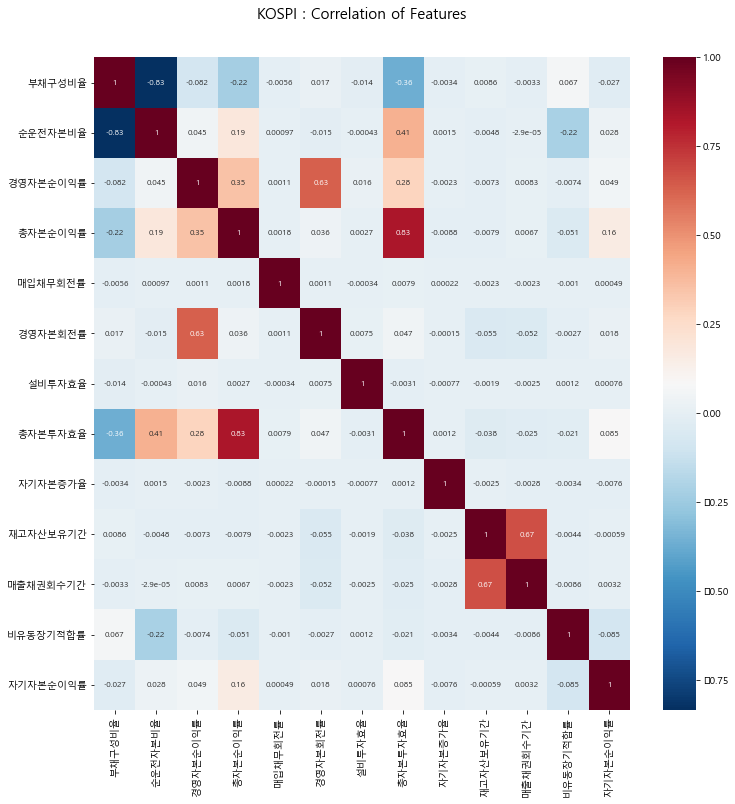

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
cor = kospi[col].corr()
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (12, 12) #그림사이즈 지정
plt.title("KOSPI : Correlation of Features", y = 1.05, size = 15)
sns.heatmap(cor, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})

In [52]:
#inf를 nan처리하여 직전, 직후값 처리
import numpy as np

print("Original DataFrame:") 
print('kospi')

print("Removing infinite values:") 
kospi = kospi.replace([np.inf, -np.inf], np.nan) # replace 메서드로 np.inf를 None(np.nan)으로 변경 print(df)
print(kospi)

cpylist = kospi['회사명'].unique()

for i in range(len(cpylist)):
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='pad') # 전년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='bfill') # 후년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(0)

Original DataFrame:
kospi
Removing infinite values:
            회사명  거래소코드     회계년도  소속코드 상장폐지일 감사의견코드  자기자본증가율  경영자본순이익률  \
0      (주)DB하이텍    990  2000/12   1.0     0     UQ     0.50      1.92   
1      (주)DB하이텍    990  2001/12   1.0     0     UQ     1.34      0.79   
2      (주)DB하이텍    990  2002/12   1.0     0     UQ     2.07      2.34   
3      (주)DB하이텍    990  2003/12   1.0     0     UQ     7.45      1.80   
4      (주)DB하이텍    990  2004/12   1.0     0     UQ    16.45      5.18   
...         ...    ...      ...   ...   ...    ...      ...       ...   
15672   흥아해운(주)   3280  2013/12   1.0     0     UQ    24.54      4.29   
15673   흥아해운(주)   3280  2014/12   1.0     0     UQ     9.18      3.77   
15674   흥아해운(주)   3280  2007/12   1.0     0     UQ   -14.34     -3.34   
15675   흥아해운(주)   3280  2008/12   1.0     0     UQ     0.94      0.78   
15676   흥아해운(주)   3280  2004/12   1.0     0     UQ   303.43     11.56   

       총자본순이익률  자기자본순이익률  ...  매입채무회전률  총자본투자효율  설비투자효율  재고자산회전률  매출채권회

In [53]:
kosdaq = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\finaldataset_ver7.6.2.csv')
kosdaq.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도',
       '신종채권_운영', '신종

In [54]:
print(kospi.columns)
print(kosdaq_.columns)

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본증가율',
       '경영자본순이익률', '총자본순이익률', '자기자본순이익률', '순운전자본비율', '비유동장기적합률', '경영자본회전률',
       '매입채무회전률', '총자본투자효율', '설비투자효율', '재고자산회전률', '매출채권회전률', '자산총계_요약__백만원_',
       '부채총계_요약__백만원_', '부채구성비율', '재고자산보유기간', '매출채권회수기간'],
      dtype='object')
Index(['부채구성비율', '순운전자본비율', '경영자본순이익률', '총자본순이익률', '매입채무회전률', '경영자본회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '재고자산보유기간', '매출채권회수기간', '비유동장기적합률',
       '자기자본순이익률'],
      dtype='object')


In [55]:
#kosdaq 파일에 최종변수 중 비유동장기적합률, 자기자본순이익률 누락으로 다른파일에서 가져와서 붙여줌 두 df shape 동일
df_0 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\finaldataset_ver7.6.2.csv')
df_0.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도',
       '신종채권_운영', '신종

In [56]:
kosdaq['비유동장기적합률'] = df_0['비유동장기적합률']
kosdaq['자기자본순이익률'] = df_0['자기자본순이익률']

In [32]:
kospi_ = kospi[col]
kospi_.columns

Index(['부채구성비율', '순운전자본비율', '경영자본순이익률', '총자본순이익률', '매입채무회전률', '경영자본회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '재고자산보유기간', '매출채권회수기간', '비유동장기적합률',
       '자기자본순이익률'],
      dtype='object')

In [33]:
kosdaq_ = kosdaq[col]
kosdaq_.columns

Index(['부채구성비율', '순운전자본비율', '경영자본순이익률', '총자본순이익률', '매입채무회전률', '경영자본회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '재고자산보유기간', '매출채권회수기간', '비유동장기적합률',
       '자기자본순이익률'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kosdaq_s = scaler.fit_transform(kosdaq_)
kosdaq_s = pd.DataFrame(kosdaq_s, columns=kosdaq_.columns, index=list(kosdaq_.index.values))
kosdaq_

,부채구성비율,순운전자본비율,경영자본순이익률,총자본순이익률,매입채무회전률,경영자본회전률,설비투자효율,총자본투자효율,자기자본증가율,재고자산보유기간,매출채권회수기간,비유동장기적합률,자기자본순이익률
0,55.519145,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00
1,57.963459,22.76,0.53,0.53,24.84,0.77,48.33,8.76,0.00,323.008850,0.330886,48.88,1.26
2,57.574183,7.98,-12.61,-12.42,58.88,1.48,3.90,0.79,-25.65,155.319149,0.280767,81.79,-29.43
3,41.851216,35.58,0.84,0.83,26.59,1.33,289.02,16.80,-1.55,166.666667,1.027041,39.12,1.70
4,50.569608,24.97,-47.74,-47.69,24.16,1.61,-412.59,-37.94,-60.20,152.083333,1.463160,49.86,-86.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26786,12.585769,14.15,4.06,2.77,179576.67,2.68,18.38,8.84,1.39,5.292923,12.281292,85.17,3.17
26787,12.711483,8.68,3.86,2.60,5044.25,2.91,18.58,8.80,0.83,6.190638,13.463667,90.23,2.97
26788,6.333271,11.59,4.52,3.06,5128.70,3.17,19.56,9.80,0.99,4.658583,11.770397,87.80,3.38
26789,7.960699,21.47,15.19,10.44,23497.93,2.76,42.99,18.02,9.31,5.335477,11.583624,77.27,11.25


In [35]:
kosdaq_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26791 entries, 0 to 26790
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   부채구성비율    26791 non-null  float64
 1   순운전자본비율   26791 non-null  float64
 2   경영자본순이익률  26791 non-null  float64
 3   총자본순이익률   26791 non-null  float64
 4   매입채무회전률   26791 non-null  float64
 5   경영자본회전률   26791 non-null  float64
 6   설비투자효율    26791 non-null  float64
 7   총자본투자효율   26791 non-null  float64
 8   자기자본증가율   26791 non-null  float64
 9   재고자산보유기간  26791 non-null  float64
 10  매출채권회수기간  26791 non-null  float64
 11  비유동장기적합률  26791 non-null  float64
 12  자기자본순이익률  26791 non-null  float64
dtypes: float64(13)
memory usage: 2.7 MB


In [36]:
kospi_

,부채구성비율,순운전자본비율,경영자본순이익률,총자본순이익률,매입채무회전률,경영자본회전률,설비투자효율,총자본투자효율,자기자본증가율,재고자산보유기간,매출채권회수기간,비유동장기적합률,자기자본순이익률
0,64.065097,-7.06,1.92,1.67,8.71,1.13,30.55,16.40,0.50,74.489796,31.739130,111.81,4.76
1,63.862759,-10.01,0.79,0.69,8.02,1.12,26.73,14.12,1.34,73.293173,27.361319,116.47,1.92
2,65.058453,-16.71,2.34,1.95,7.61,1.06,29.53,15.29,2.07,79.004329,22.081065,130.31,5.50
3,63.391288,-16.67,1.80,1.50,8.10,1.10,26.41,13.26,7.45,76.359833,19.804666,132.11,4.20
4,61.625534,-13.11,5.18,4.41,8.49,1.35,33.46,15.22,16.45,70.327553,17.615830,127.18,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,74.185723,-13.52,4.29,3.08,18.41,1.95,28.22,11.18,24.54,6.676422,12.211442,124.25,12.85
15673,75.480284,-13.72,3.77,2.82,17.00,1.80,16.96,8.64,9.18,6.384467,13.195951,121.73,11.21
15674,83.905911,-32.58,-3.34,-2.75,13.24,1.82,18.72,11.44,-14.34,5.221745,15.787197,166.25,-14.66
15675,87.696186,-18.41,0.78,0.63,16.52,1.85,19.76,11.90,0.94,4.429074,14.224474,129.65,4.52


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kospi_s = scaler.fit_transform(kospi_)
kospi_s = pd.DataFrame(kospi_s, columns=kospi_.columns, index=list(kospi_.index.values))
kospi_s

,부채구성비율,순운전자본비율,경영자본순이익률,총자본순이익률,매입채무회전률,경영자본회전률,설비투자효율,총자본투자효율,자기자본증가율,재고자산보유기간,매출채권회수기간,비유동장기적합률,자기자본순이익률
0,0.266507,-0.323487,-0.031888,-0.004008,-0.016939,-0.099411,-0.021239,0.097697,-0.041928,0.041225,-0.107977,0.344131,0.028606
1,0.263162,-0.381079,-0.041994,-0.040402,-0.016963,-0.105489,-0.021239,0.039362,-0.039919,0.037950,-0.116852,0.413602,0.011629
2,0.282929,-0.511881,-0.028132,0.006390,-0.016978,-0.141957,-0.021239,0.069297,-0.038173,0.053580,-0.127557,0.619928,0.033030
3,0.255367,-0.511100,-0.032961,-0.010321,-0.016961,-0.117645,-0.021240,0.017359,-0.025307,0.046343,-0.132173,0.646762,0.025258
4,0.226175,-0.441599,-0.002732,0.097746,-0.016947,0.034305,-0.021239,0.067506,-0.003782,0.029834,-0.136610,0.573266,0.070452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,0.433823,-0.449603,-0.010692,0.048355,-0.016598,0.398986,-0.021239,-0.035859,0.015566,-0.144363,-0.147567,0.529586,0.076968
15673,0.455225,-0.453508,-0.015343,0.038699,-0.016647,0.307815,-0.021240,-0.100847,-0.021169,-0.145162,-0.145571,0.492018,0.067164
15674,0.594519,-0.821705,-0.078930,-0.168152,-0.016780,0.319972,-0.021240,-0.029207,-0.077420,-0.148344,-0.140318,1.155719,-0.087486
15675,0.657180,-0.545069,-0.042083,-0.042630,-0.016664,0.338206,-0.021240,-0.017438,-0.040876,-0.150513,-0.143486,0.610089,0.027171


In [30]:
#그래프 생성 함수
def plot_new_feature_distribution(df1, df2, label1, label2, features, k):
    i = 0
    
    sns.set(font="malgun gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')
        
    plt.figure()
    fig, ax = plt.subplots(1,k,figsize=(20,5))

    for feature in features:
        plt.legend()
        i += 1
        plt.subplot(1,k,i)
        plt.xlim([-8, 8])
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.legend()   
    plt.show()

In [31]:
print('kospi : ', kospi_s.columns)
print('kosdap : ', kosdaq_s.columns)

kospi :  Index(['부채구성비율', '순운전자본비율', '경영자본순이익률', '총자본순이익률', '매입채무회전률', '경영자본회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '재고자산보유기간', '매출채권회수기간', '비유동장기적합률',
       '자기자본순이익률'],
      dtype='object')
kosdap :  Index(['부채구성비율', '순운전자본비율', '경영자본순이익률', '총자본순이익률', '매입채무회전률', '경영자본회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '재고자산보유기간', '매출채권회수기간', '비유동장기적합률',
       '자기자본순이익률'],
      dtype='object')


No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

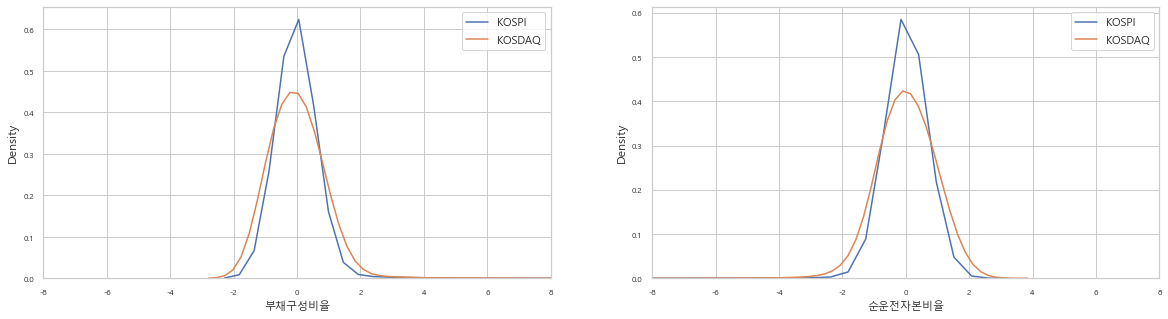

In [32]:
features = kospi_s.columns.values[0:2]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

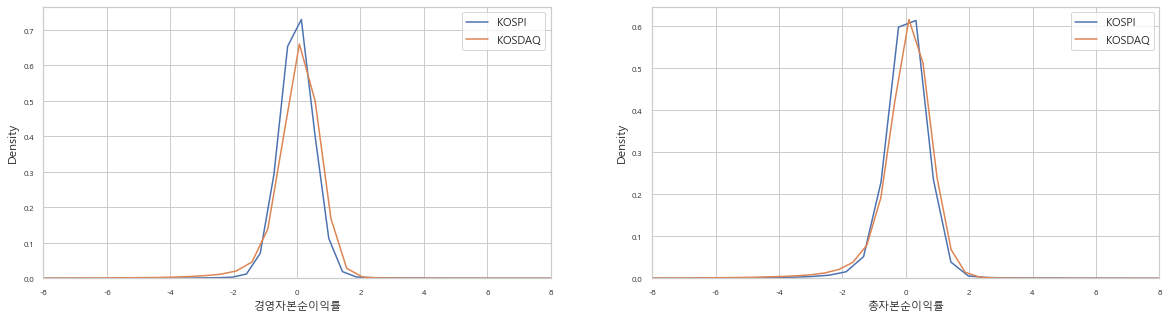

In [33]:
features = kospi_s.columns.values[2:4]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

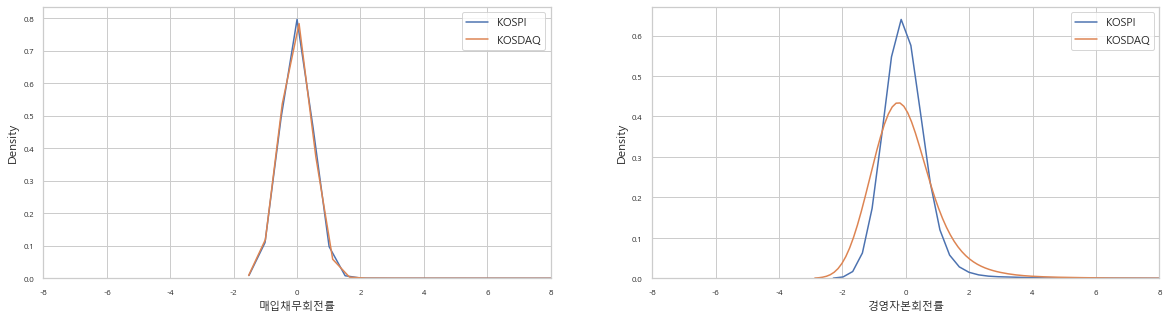

In [34]:
features = kospi_s.columns.values[4:6]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

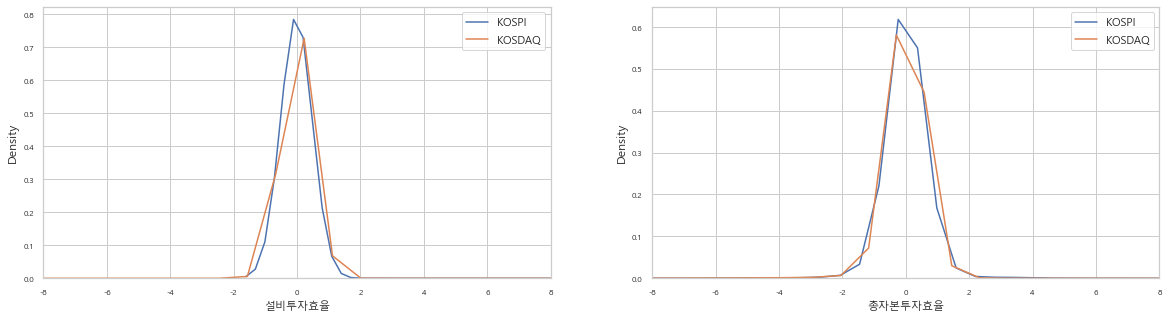

In [35]:
features = kospi_s.columns.values[6:8]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

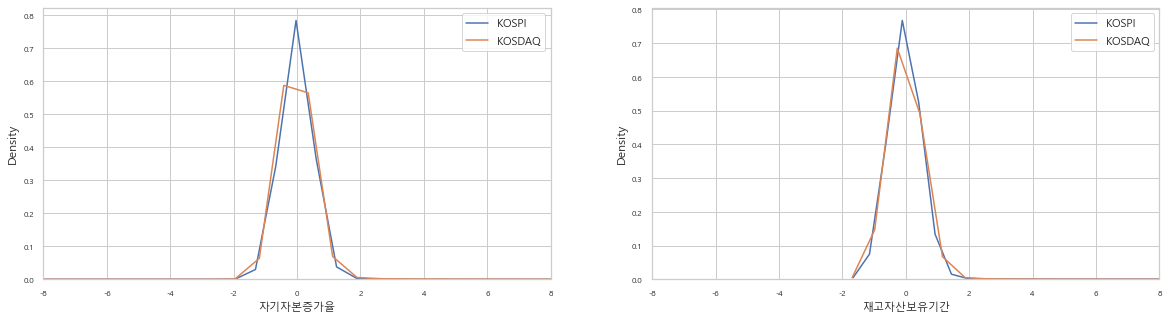

In [36]:
features = kospi_s.columns.values[8:10]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

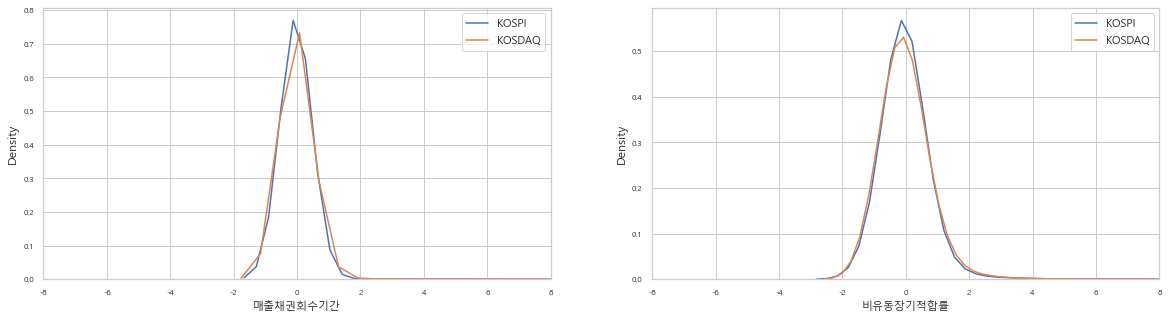

In [37]:
features = kospi_s.columns.values[10:12]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

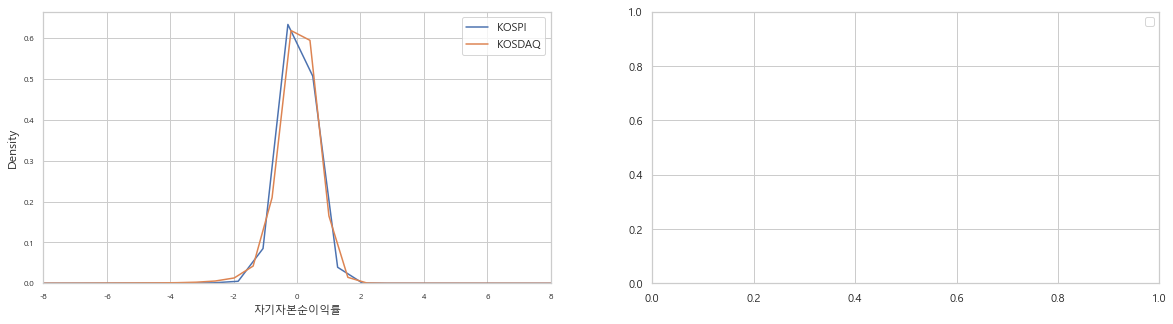

In [38]:
features = kospi_s.columns.values[12:14]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

In [39]:
kosdaq

,회사명,거래소코드,회계년도,순운전자본비율,총자본순이익률,경영자본순이익률,경영자본회전률,매입채무회전률,설비투자효율,총자본투자효율,...,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타,비유동장기적합률,자기자본순이익률
0,(주)CMG제약,58820.0,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,2000.0,588202001.0,0.0,0.0,0.0,0.0,0.00,0.00
1,(주)CMG제약,58820.0,2001/12,22.76,0.53,0.53,0.77,24.84,48.33,8.76,...,1420.0,-0.633803,2001.0,588202002.0,0.0,0.0,0.0,0.0,48.88,1.26
2,(주)CMG제약,58820.0,2002/12,7.98,-12.42,-12.61,1.48,58.88,3.90,0.79,...,520.0,-0.633803,2002.0,588202003.0,0.0,0.0,0.0,0.0,81.79,-29.43
3,(주)CMG제약,58820.0,2003/12,35.58,0.83,0.84,1.33,26.59,289.02,16.80,...,800.0,0.538462,2003.0,588202004.0,0.0,0.0,0.0,0.0,39.12,1.70
4,(주)CMG제약,58820.0,2004/12,24.97,-47.69,-47.74,1.61,24.16,-412.59,-37.94,...,550.0,-0.312500,2004.0,588202005.0,0.0,0.0,0.0,0.0,49.86,-86.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060.0,2016/12,14.15,2.77,4.06,2.68,179576.67,18.38,8.84,...,3425.0,0.126645,2016.0,240602017.0,0.0,0.0,0.0,0.0,85.17,3.17
26828,흥구석유(주),24060.0,2017/12,8.68,2.60,3.86,2.91,5044.25,18.58,8.80,...,2775.0,-0.189781,2017.0,240602018.0,0.0,0.0,0.0,0.0,90.23,2.97
26829,흥구석유(주),24060.0,2018/12,11.59,3.06,4.52,3.17,5128.70,19.56,9.80,...,2705.0,-0.025225,2018.0,240602019.0,0.0,0.0,0.0,0.0,87.80,3.38
26830,흥구석유(주),24060.0,2019/12,21.47,10.44,15.19,2.76,23497.93,42.99,18.02,...,5360.0,0.981516,2019.0,240602020.0,0.0,0.0,0.0,0.0,77.27,11.25


In [45]:
#kosdaq.to_csv('kosdaq.csv')